In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Test the Foward part of the Network
> * Now make sure that we can map from an image into an SxSx2x11 Tensor
> * First make sure that the Yolo2 weights are loadable and make sense.

In [8]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from Model.vis_utils import visualize_grid

In [9]:
# l2 = np.array(list((yolo_weights['model_weights']['conv2d_1']['conv2d_1'][u'kernel:0'])))
# grid = visualize_grid(l2.transpose(3, 1, 2, 0))
# print (grid.shape, l2.shape)
# plt.imshow(grid.astype('uint8'))
# plt.axis('off')
# plt.gcf().set_size_inches(5, 5)
# plt.show()

#### 2.1 Overfit Localizer in Tiny Data
> * For debugging, we run the foward, and backward pass for `a few`
epochs.

In [43]:
import torch
print(torch.__version__)
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from Model.dataloader import NutritionDataset
from Model.net import LocalizerNet
from train import train_localizer, calculate_iou

0.4.0


In [44]:
def train_localizer_network():
    IMAGE_DIR = '../Data/FullData/RawImages/'
    BOXES = '../Data/FullData/BoundingBoxes.npy'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    YOLO_PATH = '../Data/FullData/yolo.h5'
    debug = not torch.cuda.is_available()
    dataset = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, debug=debug),
        batch_size=64, shuffle=True, num_workers=8,
    )
    dev = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, split='dev', debug=debug),
        batch_size=64, shuffle=True, num_workers=8,
    )
    config = {
        'keep_prob' : 0.9995
    }
    model = LocalizerNet(YOLO_PATH, use_full_yolo=True, config_params=config)
    optimizer = torch.optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=2.5e-4, weight_decay=0.0005
    )
    scheduler = torch.optim.lr_scheduler.MultiStepLR(
        optimizer, [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91],
        gamma=0.995
    )
    r = train_localizer(
        model, optimizer, dataset, dev, epochs=100, 
        scheduler=scheduler, restore=False
    )
    return r   

In [45]:
train_losses, dev_losses, train_map, dev_map = train_localizer_network()

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  9.332874298095703
	 Dev Loss =  7.5128936767578125
	 Train mAP =  [0. 0. 0. 0. 0.]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  2.382856845855713
	 Dev Loss =  0.7322511672973633
	 Train mAP =  [0.05 0.05 0.05 0.05 0.05]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.2647261917591095
	 Dev Loss =  0.7394422292709351
	 Train mAP =  [0. 0. 0. 0. 0.]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.5306253433227539
	 Dev Loss =  0.6696798801422119
	 Train mAP =  [0. 0. 0. 0. 0.]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.056770600378513336
	 Dev Loss =  0.11258413642644882
	 Train mAP =  [0.25 0.2  0.05 0.   0.  ]
	 Dev mAP =  [0.125 0.    0.    0.    0.   ]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.13854990899562836
	 Dev Loss =  0.10610243678092957
	 Train mAP =  [0.05 0.05 0.05 0.05 0.05]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.028391234576702118
	 Dev Loss =  0.16858433187007904
	 Train mAP =  [0.9        0.43333333 0.16666667 0.         0.        ]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.04612188786268234
	 Dev Loss =  0.15894944965839386
	 Train mAP =  [0.5 0.5 0.5 0.  0. ]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.010996992699801922
	 Dev Loss =  0.08867721259593964
	 Train mAP =  [0.9  0.55 0.45 0.15 0.  ]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.014070382341742516
	 Dev Loss =  0.0762147605419159
	 Train mAP =  [0.55 0.3  0.2  0.   0.  ]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.005243701860308647
	 Dev Loss =  0.0948060005903244
	 Train mAP =  [0.85 0.75 0.5  0.1  0.  ]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.004694287199527025
	 Dev Loss =  0.09557777643203735
	 Train mAP =  [0.85 0.8  0.5  0.3  0.  ]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.0023071938194334507
	 Dev Loss =  0.08205453306436539
	 Train mAP =  [0.95 0.95 0.9  0.4  0.  ]
	 Dev mAP =  [0.1 0.  0.  0.  0. ]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.0014787426916882396
	 Dev Loss =  0.07954636961221695
	 Train mAP =  [0.95 0.9  0.75 0.55 0.25]
	 Dev mAP =  [0. 0. 0. 0. 0.]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.0009800432017073035
	 Dev Loss =  0.08464555442333221
	 Train mAP =  [0.95 0.95 0.9  0.65 0.1 ]
	 Dev mAP =  [0.16666667 0.         0.         0.         0.        ]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.00045986578334122896
	 Dev Loss =  0.08363676816225052
	 Train mAP =  [1.   1.   0.9  0.85 0.5 ]
	 Dev mAP =  [0.16666667 0.         0.         0.         0.        ]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.0005228143418207765
	 Dev Loss =  0.08072841912508011
	 Train mAP =  [1.   1.   0.95 0.95 0.6 ]
	 Dev mAP =  [0.125 0.    0.    0.    0.   ]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.0001727308554109186
	 Dev Loss =  0.0802358090877533
	 Train mAP =  [1.   1.   1.   0.95 0.7 ]
	 Dev mAP =  [0.16666667 0.         0.         0.         0.        ]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.00023463448451366276
	 Dev Loss =  0.08297383040189743
	 Train mAP =  [1.   1.   0.95 0.95 0.8 ]
	 Dev mAP =  [0.16666667 0.         0.         0.         0.        ]


HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))


=== Performance Check ===
	 Train Loss =  0.00010934477904811502
	 Dev Loss =  0.08082882314920425
	 Train mAP =  [1.  1.  1.  1.  0.9]
	 Dev mAP =  [0.125 0.    0.    0.    0.   ]


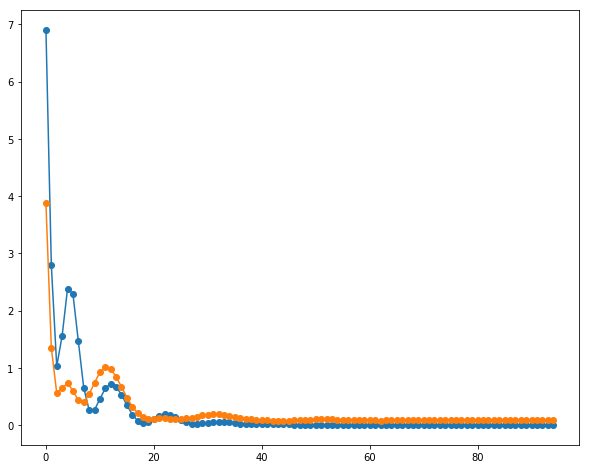

In [50]:
plt.plot(train_losses[5:], '-o')
plt.plot(dev_losses[5:], '-o')

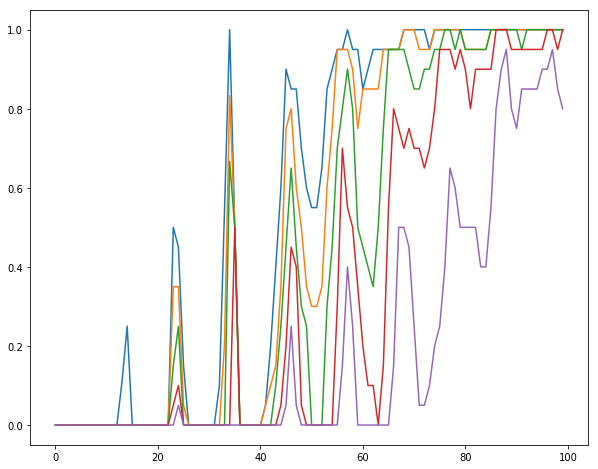

In [40]:
# plt.plot(dev_map, '-o')
plt.plot(train_map)
# plt.savefig('goals2.png')

In [ ]:
def calculate_mean_image():
    '''
    calculate the mean image on the training set at 
    different sizes, (270, 480) and (540, 960)
    '''
    IMAGE_DIR = '../Data/FullData/RawImages/'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    image_paths = [os.path.join(IMAGE_DIR, f) for f in np.load(DATA_PATH).item()['train']]
    mean_270, mean_540 = np.zeros((480, 270, 3)), np.zeros((960, 540, 3))
    for img in tqdm(image_paths):
        mean_270 += resized_image((1080//4, 1920//4), img)
        mean_540 += resized_image((1080//2, 1920//2), img)
    N = len(image_paths)
    return mean_270 / N, mean_540 / N

def resized_image(size, path):
    with Image.open(path) as img:
        img = img.resize(size, resample=Image.BILINEAR)
        img = np.asarray(img)
    return img